In [2]:
import networkx as nx
import random

import numpy as np

import matplotlib.pyplot as plt

import csv

In [3]:
def visualize_network(network):
    """Creates image of adjacency matrix of network, where each black dot represents an edge"""
    adjmatrix = nx.adjacency_matrix(network)
    adjmatrix = adjmatrix.toarray()
    
    plt.gray()
    plt.imshow((-1)*(adjmatrix-1))

In [4]:
def degree_seq_to_csv(network, namefile):
    """Creates 'namefile.csv' file with degree sequence of network"""
    
    fields = ['degree']
    
    l = [network.degree(i) for i in range(len(network.nodes))]
    
    with open(namefile, 'w') as f:
        write = csv.writer(f)
        write.writerow(fields)
        write.writerows([[x] for x in l])

Our goal is to study and distinguish three types of nodes in a network:

-*No cluster*: Nodes belonging to no particular community/cluster (these two words will be used interchangeably).

*-In cluster*: Nodes belonging to "a flat" cluster. There are no "clusters within" this cluster.

-*In hierarchical cluster*: Nodes belonging to a cluster which has sub-clusters within.

*******
We'll attempt to create a random graph model where there are `nc` vertices of type *no cluster*, `ic` vertices of type *In cluster* and `ihc` vertices of type *In hierarchical cluster* .

Integers will represent nodes. Numbers 0, 1, ..., `nc-1` will be nodes of type *No cluster*; numbers `nc`, `nc` +1, ..., `nc`+ `ic` - 1, will be of type *In cluster*, and the rest will of type *In hierarchical cluster*



We will aim for an almost $k$-regular network

In [5]:
k = 30

On each node, we will create $k$ *stubs* (think half-edges). While we have stubs, we will choose one uniformly at random. We will look at the type of the node, and depending on its type, we will choose a second type with certain probability. Then we will choose a second stub uniformly at random **from this second type** and match it with our first stub

If we have type 'nc', we will match it with any stub uniformly at random.

If we have type 'ic', we will match it with a stub of type 'ic' with probability $p$.

If we have type 'ihc1', we will match it with a stub of type 'ihc1' with probability $p^2$, or with a stub of type 'ihc2' with probability $p(1-p)$

In [6]:
p = .7
q = 1-p

**********
For our first try, our goal is to create a network with 80 nodes in no cluster, 50 in a single cluster, and 150 in a hierarchical cluster which consists of two sub-clusters of 90 and 60 nodes each

In [7]:
nc, ic, ihc1, ihc2 = 80, 50, 90, 60

no_cluster = [x for x in range(nc)] 

in_cluster = [x + nc for x in range(ic)] 

in_hier_cluster1 = [x + nc + ic for x in range(ihc1)] 

in_hier_cluster2 = [x + nc + ic + ihc1 for x in range(ihc2)]

In [8]:
G = nx.Graph()

G.add_nodes_from(no_cluster + in_cluster + in_hier_cluster1 + in_hier_cluster2)

In [9]:
stubs = ([node for node in no_cluster for i in range(k)]
         + [node for node in in_cluster for i in range(k)]
         + [node for node in in_hier_cluster1 for i in range(k)]
        + [node for node in in_hier_cluster2 for i in range(k)])

In [10]:
while len(stubs) > 0:
    stub1 = np.random.choice(a = stubs)
     
    #Determine possible matches depending on type of stub1 
    if stub1 in no_cluster:
        possible_matches = [st for st in stubs]
        
    elif stub1 in in_cluster: 
        u = random.uniform(0,1)
        if u < p:
            possible_matches = [st for st in stubs if st in in_cluster]

        else:
            possible_matches = [st for st in stubs if st not in in_cluster]
            
    elif stub1 in in_hier_cluster1:
        u = random.uniform(0,1)
        if u < p*p:
            possible_matches = [st for st in stubs if st in in_hier_cluster1]
            
        elif u < (p*p + p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster2]
        else:
            possible_matches = [st for st in stubs if st not in in_hier_cluster1 + in_hier_cluster2]
        
    elif stub1 in in_hier_cluster2:
        u = random.uniform(0,1)
        if u < p*p:
            possible_matches = [st for st in stubs if st in in_hier_cluster2]
            
        elif u < (p*p + p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster1]
        else:
            possible_matches = [st for st in stubs if st not in in_hier_cluster1 + in_hier_cluster2]
    
    #Now we have a list of possible matches
    #If its empty, we do nothing
    if stub1 in possible_matches:
        possible_matches.remove(stub1)
    
    if len(possible_matches) > 0:
        stub2 = np.random.choice(a = possible_matches)
        G.add_edge(stub1, stub2)
        stubs.remove(stub1)
        stubs.remove(stub2)      

In [11]:
len(G.edges)

3904

In [12]:
G.remove_edges_from(nx.selfloop_edges(G))

In [13]:
len(G.edges)

3875

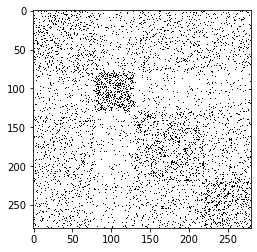

In [14]:
visualize_network(G)

In [15]:
set([G.degree(i) for i in range(len(G.nodes))])

{22, 23, 24, 25, 26, 27, 28, 29, 30}

***********

**********
A second example, changing the way we deal with 'no cluster' nodes

In [32]:
nc, ic, ihc1, ihc2 = 80, 50, 90, 60

no_cluster = [x for x in range(nc)] 

in_cluster = [x + nc for x in range(ic)] 

in_hier_cluster1 = [x + nc + ic for x in range(ihc1)] 

in_hier_cluster2 = [x + nc + ic + ihc1 for x in range(ihc2)]

In [33]:
G = nx.Graph()

G.add_nodes_from(no_cluster + in_cluster + in_hier_cluster1 + in_hier_cluster2)

In [34]:
stubs = ([node for node in no_cluster for i in range(k)]
         + [node for node in in_cluster for i in range(k)]
         + [node for node in in_hier_cluster1 for i in range(k)]
        + [node for node in in_hier_cluster2 for i in range(k)])

In [35]:
while len(stubs) > 0:
    stub1 = np.random.choice(a = stubs)
     
    #Determine possible matches depending on type of stub1 
    if stub1 in no_cluster:
        u = random.uniform(0,1)
        #This is what's different from our previous example. We are
        #choosing a node outside of 'no_cluster' with prob = .75
        if u < .25: 
            possible_matches = [st for st in stubs if st in no_cluster]
        else:
            possible_matches = [st for st in stubs if st not in no_cluster]
        
    elif stub1 in in_cluster: 
        u = random.uniform(0,1)
        if u < p:
            possible_matches = [st for st in stubs if st in in_cluster]

        else:
            possible_matches = [st for st in stubs if st not in in_cluster]
            
    elif stub1 in in_hier_cluster1:
        u = random.uniform(0,1)
        if u < p*p:
            possible_matches = [st for st in stubs if st in in_hier_cluster1]
            
        elif u < (p*p + p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster2]
        else:
            possible_matches = [st for st in stubs if st not in in_hier_cluster1 + in_hier_cluster2]
        
    elif stub1 in in_hier_cluster2:
        u = random.uniform(0,1)
        if u < p*p:
            possible_matches = [st for st in stubs if st in in_hier_cluster2]
            
        elif u < (p*p + p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster1]
        else:
            possible_matches = [st for st in stubs if st not in in_hier_cluster1 + in_hier_cluster2]
    
    #Now we have a list of possible matches
    #If its empty, we do nothing
    if stub1 in possible_matches:
        possible_matches.remove(stub1)
    
    if len(possible_matches) > 0:
        stub2 = np.random.choice(a = possible_matches)
        G.add_edge(stub1, stub2)
        stubs.remove(stub1)
        stubs.remove(stub2)      

In [36]:
len(G.edges)

3941

In [37]:
G.remove_edges_from(nx.selfloop_edges(G))

In [38]:
len(G.edges)

3917

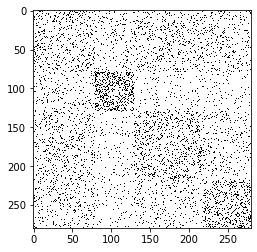

In [39]:
visualize_network(G)

In [40]:
set([G.degree(i) for i in range(len(G.nodes))])

{23, 24, 25, 26, 27, 28, 29, 30}

--------------
Now a similar set up, but with 30 nodes in no cluster, two 'flat' clusters of 45 and 35 nodes each, and two hierarchical clusters. One hierarchical cluster will have 65 nodes, with two subclusters of 25 and 40 nodes each. 

The second hierarchical cluster will have 100 nodes, a subcluster of 30 nodes and a second subcluster of 70 nodes. The second subcluster will itself consist of two subclusters of 25 and 45 nodes.

This adds up to a total of 550 nodes

In [69]:
k = 30

In [70]:
p = .7
q = 1-p

In [71]:
nc = 30
a_ic = 45
b_ic = 35
a_ihc1 = 25
a_ihc2 = 40
b_ihc1 = 30
b_ihc2_1 = 25
b_ihc2_2 = 45

In [72]:
no_cluster = [i for i in range(nc)]

in_cluster_a = [i + nc for i in range(a_ic)]

in_cluster_b = [i + nc + a_ic for i in range(b_ic)]

in_hier_cluster_a1 = [i + nc + a_ic + b_ic for i in range(a_ihc1)]

in_hier_cluster_a2 = [i + nc + a_ic + b_ic + a_ihc1 for i in range(a_ihc2)]

in_hier_cluster_b1 = [i + nc + a_ic + b_ic + a_ihc1 + a_ihc2 for i in range(b_ihc1)]

in_hier_cluster_b2_1 = [i + nc + a_ic + b_ic + a_ihc1 + a_ihc2 + b_ihc1 for i in range(b_ihc2_1)]

in_hier_cluster_b2_2 = [i + nc + a_ic + b_ic + a_ihc1 + a_ihc2 + b_ihc1 + b_ihc2_1 for i in range(b_ihc2_2)]

In [73]:
G = nx.Graph()

(G.add_nodes_from(no_cluster 
                  + in_cluster_a
                  + in_cluster_b
                  + in_hier_cluster_a1
                  + in_hier_cluster_a2
                  + in_hier_cluster_b1
                  + in_hier_cluster_b2_1
                  + in_hier_cluster_b2_2))

In [74]:
len(G.nodes)

275

In [75]:
stubs = ([node for node in no_cluster for i in range(k)]
         + [node for node in in_cluster_a for i in range(k)]
         + [node for node in in_cluster_b for i in range(k)]
         + [node for node in in_hier_cluster_a1 for i in range(k)]
         + [node for node in in_hier_cluster_a2 for i in range(k)]
         + [node for node in in_hier_cluster_b1 for i in range(k)]
         + [node for node in in_hier_cluster_b2_1 for i in range(k)]
         + [node for node in in_hier_cluster_b2_2 for i in range(k)])

In [76]:
while len(stubs) > 0:
    stub1 = np.random.choice(a = stubs)
     
    #Determine possible matches depending on type of stub1 
    if stub1 in no_cluster:
        possible_matches = [st for st in stubs]
        
    elif stub1 in in_cluster_a: 
        u = random.uniform(0,1)
        if u < p:
            possible_matches = [st for st in stubs if st in in_cluster_a]

        else:
            possible_matches = [st for st in stubs if st not in in_cluster_a]
    
    elif stub1 in in_cluster_b: 
        u = random.uniform(0,1)
        if u < p:
            possible_matches = [st for st in stubs if st in in_cluster_b]

        else:
            possible_matches = [st for st in stubs if st not in in_cluster_b]
            
    elif stub1 in in_hier_cluster_a1:
        u = random.uniform(0,1)
        if u < p*p:
            possible_matches = [st for st in stubs if st in in_hier_cluster_a1]
            
        elif u < (p*p + p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster_a2]
        else:
            possible_matches = [st for st in stubs if st not in in_hier_cluster_a1 + in_hier_cluster_a2]
        
    elif stub1 in in_hier_cluster_a2:
        u = random.uniform(0,1)
        if u < p*p:
            possible_matches = [st for st in stubs if st in in_hier_cluster_a2]
            
        elif u < (p*p + p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster_a1]
        else:
            possible_matches = [st for st in stubs if st not in in_hier_cluster_a1 + in_hier_cluster_a2]
    
    elif stub1 in in_hier_cluster_b1:
        u = random.uniform(0,1)
        if u < p*p:
            possible_matches = [st for st in stubs if st in in_hier_cluster_b1]
        elif u < (p*p + p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster_b2_1 + in_hier_cluster_b2_2]
        else:
            possible_matches = [st for st in stubs if st not in in_hier_cluster_b1 + in_hier_cluster_b2_1 + in_hier_cluster_b2_2]
            
    elif stub1 in in_hier_cluster_b2_1:
        u = random.uniform(0,1)
        if u < p*p*p:
            possible_matches = [st for st in stubs if st in in_hier_cluster_b2_1]
        elif u < (p*p*p + p*p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster_b2_2]
        elif u < (p*p*p + p*p*q + p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster_b1]
        else:
            possible_matches = [st for st in stubs if st not in in_hier_cluster_b1 + in_hier_cluster_b2_1 + in_hier_cluster_b2_2]
    
    elif stub1 in in_hier_cluster_b2_2:
        u = random.uniform(0,1)
        if u < p*p*p:
            possible_matches = [st for st in stubs if st in in_hier_cluster_b2_2]
        elif u < (p*p*p + p*p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster_b2_1]
        elif u < (p*p*p + p*p*q + p*q):
            possible_matches = [st for st in stubs if st in in_hier_cluster_b1]
        else: 
            possible_matches = [st for st in stubs if st not in in_hier_cluster_b1 + in_hier_cluster_b2_1 + in_hier_cluster_b2_2]
        
    #Now we have a list of possible matches
    #If its empty, we do nothing
    if stub1 in possible_matches:
        possible_matches.remove(stub1)
    
    if len(possible_matches) > 0:
        stub2 = np.random.choice(a = possible_matches)
        G.add_edge(stub1, stub2)
        stubs.remove(stub1)
        stubs.remove(stub2)      

In [77]:
len(G.edges)

3716

In [78]:
G.remove_edges_from(nx.selfloop_edges(G))

In [79]:
len(G.edges)

3658

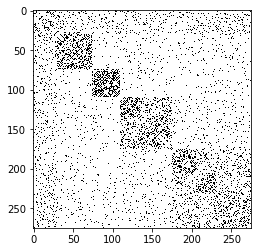

In [80]:
visualize_network(G)